# Análise Financeira com Python

### Objetivo: 

Treinar e aprimorar conhecimentos em Pyhton dentro da área de Data Science, obtendo dados históricos e analisar ações da bolsa utilizando Pandas e outras bibliotecas.

Usar o Python para puxar dados da Web de cotação de algumas ações definidas aleatoriamente, juntando-as em uma carteira para a partir dai começar a realizar algumas análises.

A importação dos dados foi feita utilizando download dos dados diretamente do site do Yahoo Finance, importando de forma personalizada somente as informações que interessavam para o presente projeto.

Esta é uma introdução básica sobre análise de dados históricos de ações e não tem por finalidade a recomendação de compra de nunhum ativo.

É possível após essas primeiras análises realizar análises mais profundas e implementar modelos preditivos de machine learning.

In [10]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns
from datetime import datetime

In [17]:
#importando os tickers do yahoo finance
ativos_df = pd.DataFrame()
tickers = ['CPFE3.SA', 'BBAS3.SA', 'ALUP11.SA', 'BBSE3.SA', 'AGRO3.SA', 'TRPL4.SA', 'BBDC4.SA', 'PSSA3.SA', '^BVSP']

end = datetime.now()

for i in tickers:
    ativos_df[i] = web.DataReader(i, data_source='yahoo', start='2020-01-01', end=end)['Adj Close']

#A fim de melhor visualização, as colunas foram renomeadas e foi realizada uma transformação 
#na pontuação do Ibovespa, dividindo seus valores por 1000.
ativos_df.rename(columns={'CPFE3.SA': 'CPFE3', 'BBAS3.SA': 'BBAS3', 'ALUP11.SA': 'ALUP11', 'BBSE3.SA': 'BBSE3', 'AGRO3.SA': 'AGRO3', 'TRPL4.SA': 'TRPL4', 'BBDC4.SA': 'BBDC4', 'PSSA3.SA':'PSSA3', '^BVSP': 'IBOV'}, inplace=True)
ativos_df['IBOV'] = ativos_df['IBOV']/1000
#ativos_df.reset_index(inplace = True)
#ativos_df.dropna(subset = ['IBOV'], inplace=True)
display(ativos_df)

,CPFE3,BBAS3,ALUP11,BBSE3,AGRO3,TRPL4,BBDC4,PSSA3,IBOV
Date,,,,,,,,,
2020-01-02,24.918724,46.584736,25.095985,31.211931,15.952595,18.277996,26.089586,28.270971,118.573
2020-01-03,24.763025,46.506805,25.526510,30.867863,16.118338,17.820442,26.102787,27.548111,117.707
2020-01-06,24.996574,45.892029,25.687956,31.375776,16.126625,17.924795,25.636539,28.085844,116.878
2020-01-07,24.706409,45.545677,25.140833,31.392155,16.076902,17.796362,25.191168,28.068216,116.662
2020-01-08,24.550711,45.130047,24.862785,31.375776,15.911162,17.659899,24.801468,27.768490,116.247
...,...,...,...,...,...,...,...,...,...
2022-05-16,35.410000,35.110001,26.190001,25.520000,31.610001,24.450001,19.530001,20.150000,108.233
2022-05-17,36.580002,36.430000,26.360001,25.809999,31.639999,24.540001,19.930000,20.680000,108.789
2022-05-18,35.770000,35.910000,26.400000,25.410000,30.620001,24.690001,19.559999,20.500000,106.247


In [18]:
#verificando se há algum valor nulo ou ausente no dataframe
print(ativos_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2020-01-02 to 2022-05-20
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPFE3   591 non-null    float64
 1   BBAS3   591 non-null    float64
 2   ALUP11  591 non-null    float64
 3   BBSE3   591 non-null    float64
 4   AGRO3   591 non-null    float64
 5   TRPL4   591 non-null    float64
 6   BBDC4   591 non-null    float64
 7   PSSA3   591 non-null    float64
 8   IBOV    591 non-null    float64
dtypes: float64(9)
memory usage: 46.2 KB
None


### Grafico Cotação x Tempo

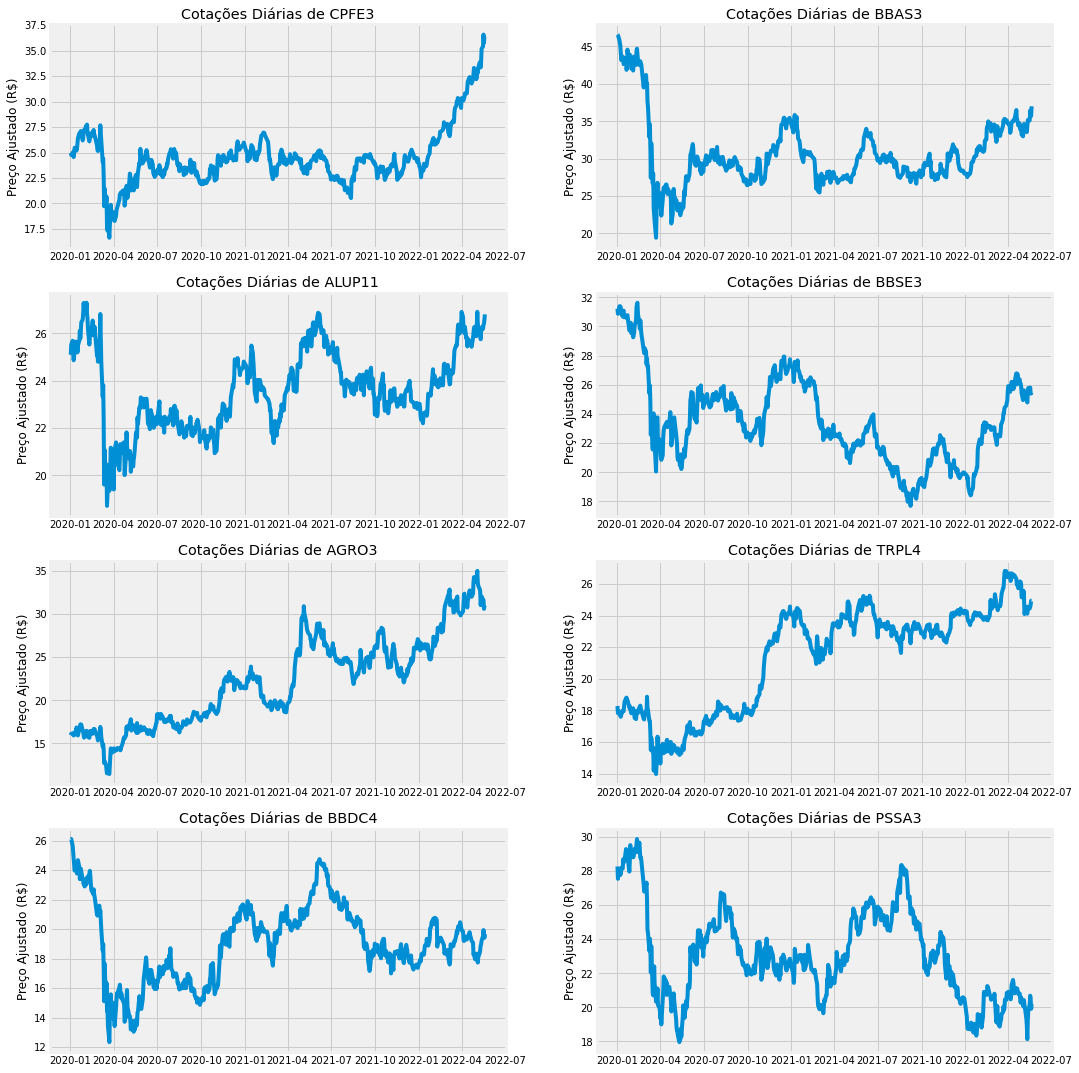

In [22]:
#elaboração de gráficos individuais para termos uma visão histórica do preço de fechamento
#de cada ativo da nosso DataFrame inicial
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.figure(figsize=(16 ,6))
plt.subplots_adjust(top=6, bottom=3)

for i, column in enumerate(ativos_df, 1):    
    if 'IBOV' not in column:
        plt.subplot(5, 2, i)
        plt.plot(ativos_df.index, ativos_df[column])
        plt.ylabel('Preço Ajustado (R$)')
        plt.xlabel(None)
        plt.title(f'Cotações Diárias de {column}')

Text(0, 0.5, 'Preço de fechamento')

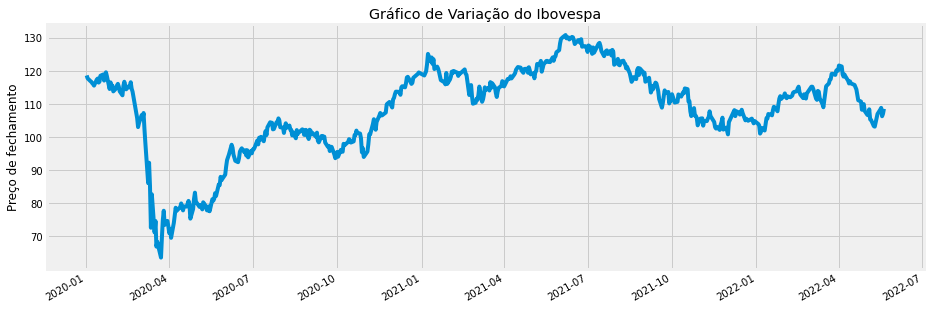

In [23]:
ativos_df['IBOV'].plot(figsize=(14,5), grid=True, title='Gráfico de Variação do Ibovespa')
plt.xlabel(None)
plt.ylabel('Preço de fechamento')

Uma forma muito interessante de analisar o comportamento de um ativo no longo prazo é visualizar suas médias móveis, e isso pode ser feito de forma muito simples com o pacote Pandas. 
Nesse caso foi utilizado o método .rolling do Pandas para criar e plotar médias de 21 e 50 dias no ativo BBAS3, utilizado aqui como exemplo.

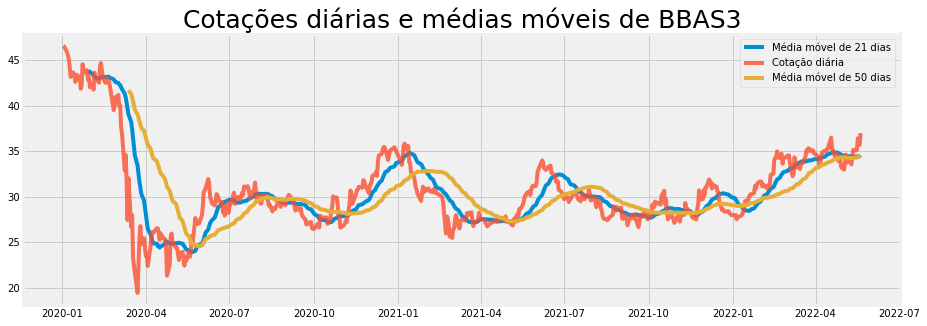

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(ativos_df['BBAS3'].rolling(window = 21).mean())
plt.plot(ativos_df['BBAS3'], alpha = 0.8)
plt.plot(ativos_df['BBAS3'].rolling(window = 50).mean())
plt.title('Cotações diárias e médias móveis de BBAS3', fontsize = 25)
plt.legend(['Média móvel de 21 dias','Cotação diária','Média móvel de 50 dias'])
plt.show()

### Retorno Diário

Com a cotação histórica também podemos criar um novo DataFrame de retorno diário, utilizando o método pct_change(). Com isso foi possível obter algumas informações mais profundas sobre os ativos utilizando os pacotes Pandas, Seaborn e Matplotlib.

In [25]:
retorno = pd.DataFrame()

for i in ativos_df:    
    retorno[i] = ativos_df[i].pct_change()

retorno.describe()

,CPFE3,BBAS3,ALUP11,BBSE3,AGRO3,TRPL4,BBDC4,PSSA3,IBOV
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.000883,0.000041,0.000260,-0.000138,0.001377,0.000647,-0.000096,-0.000353,0.000066
std,0.021782,0.029307,0.017181,0.020326,0.023057,0.015501,0.027693,0.020924,0.020661
min,-0.136691,-0.166895,-0.122088,-0.095077,-0.107621,-0.092403,-0.142744,-0.118087,-0.147797
25%,-0.011099,-0.012610,-0.008285,-0.011145,-0.012215,-0.006808,-0.014034,-0.011623,-0.008850
50%,0.001022,0.000000,0.000175,0.000452,0.000925,0.000000,-0.000766,-0.001584,0.000526
75%,0.012317,0.012300,0.009410,0.010302,0.014514,0.008154,0.013421,0.010987,0.010489
max,0.087908,0.171261,0.075023,0.107558,0.099275,0.066003,0.168670,0.091099,0.139082


Esta simples tabela possui informações muito ricas, principalmente o desvio padrão e média dos retornos das ações. O desvio padrão(std) do retorno diário representa a volatilidade. No periodo selecionado TRPL4 foi o ativo mais voláteis. E é possível verificar que BBSE3, BBDC4 e PSSA3 possuem no período retorno diário médio negativo. 

Pairplot nos permite visualizar as relações entre cada variável do nosso dataset:

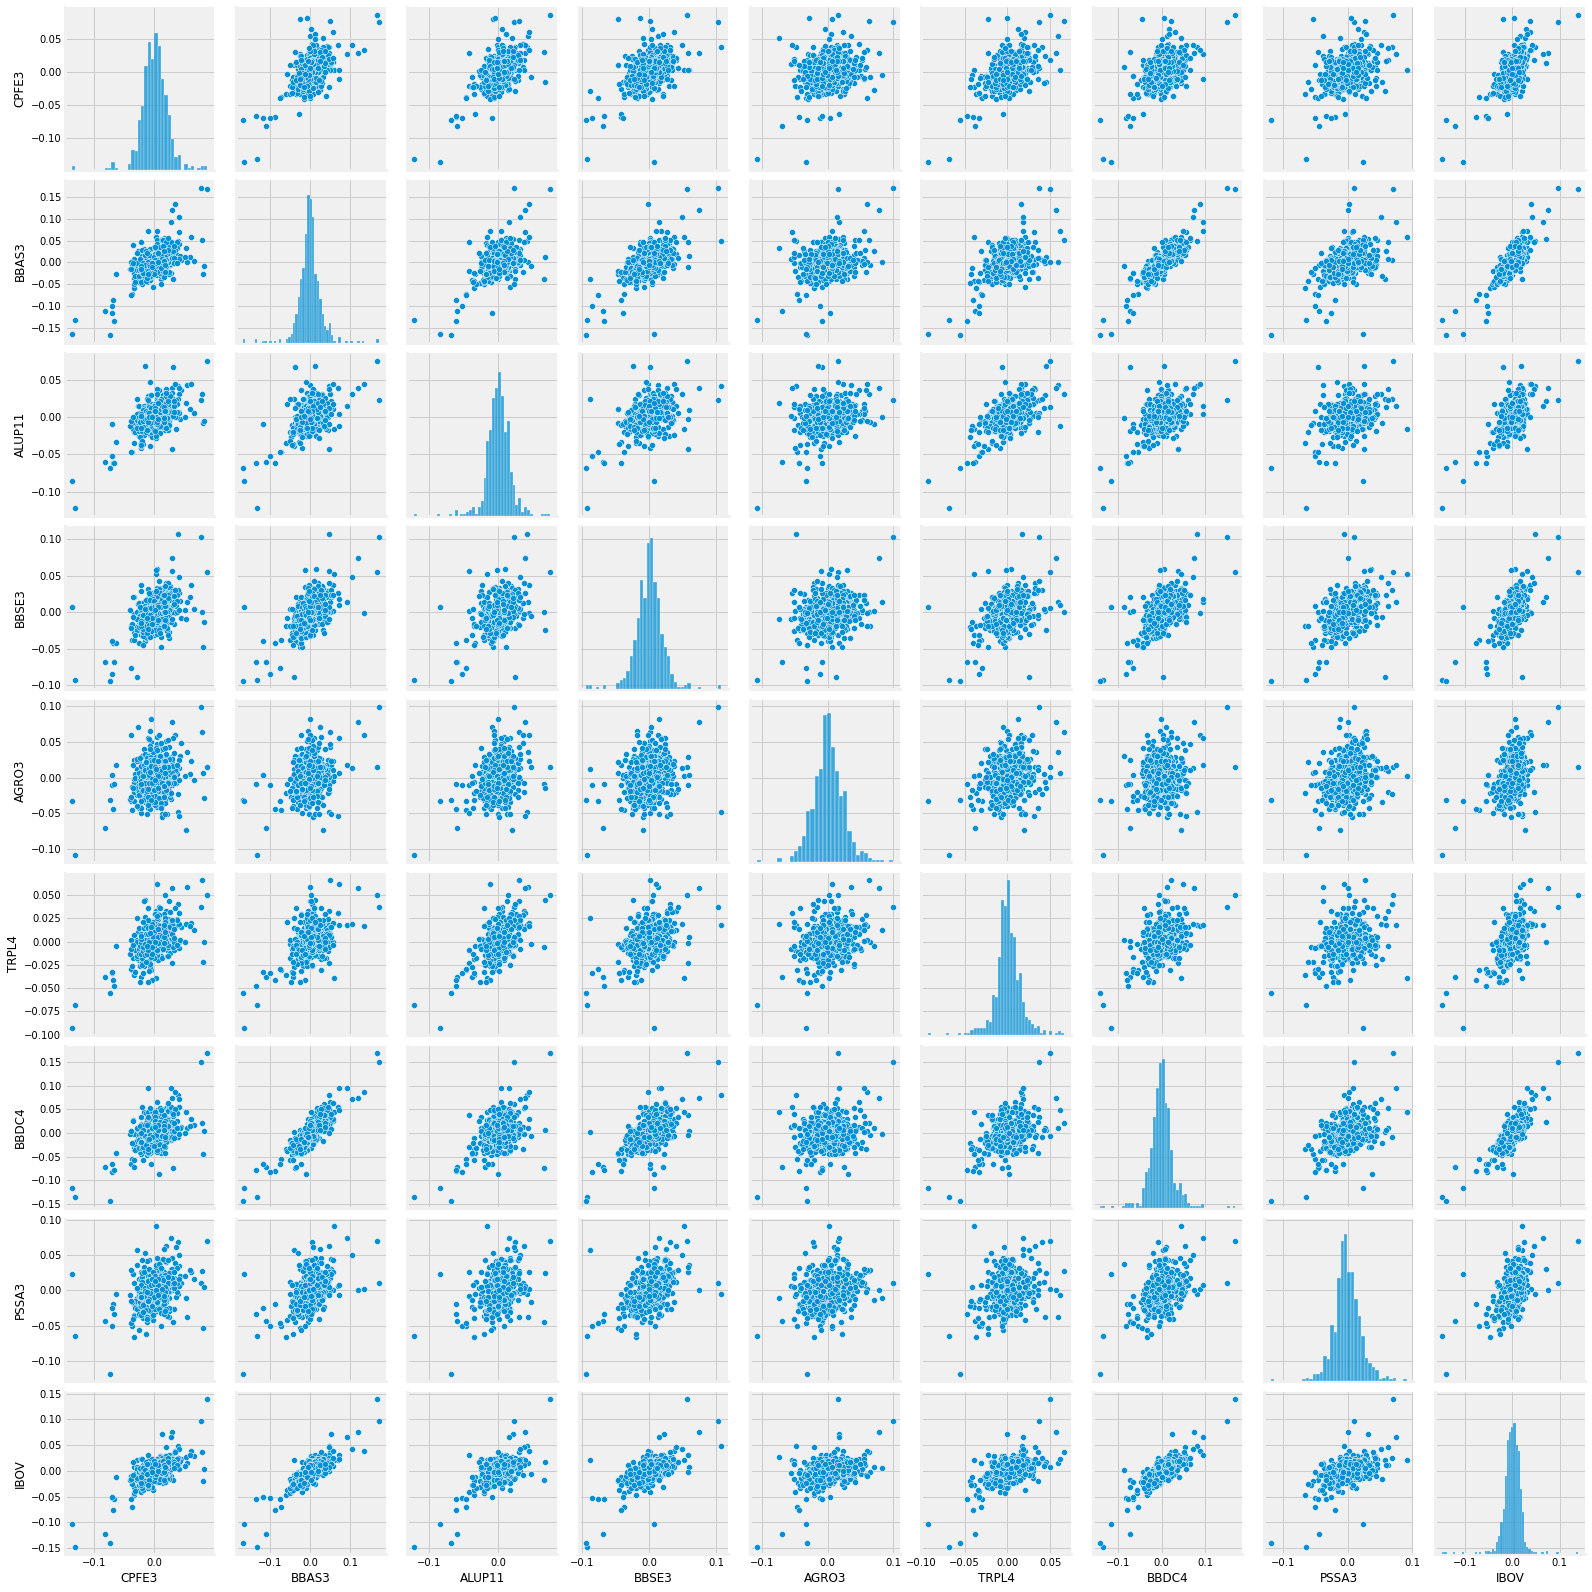

In [26]:
sns.pairplot(retorno)
plt.show()

A distribuição das variações diárias do Ibovespa é uma distribuição normal:

<AxesSubplot:xlabel='IBOV', ylabel='Count'>

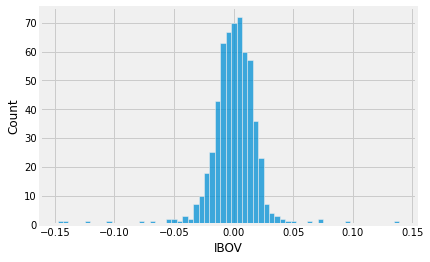

In [27]:
sns.histplot(retorno['IBOV'].dropna())

### Retorno acumulado

O retorno acumulado de um ativo é calculado multiplicando os retornos diários somados por 1. Por exemplo: o retorno acumulado de 3 dias em que uma ação subiu 2% é (1.02 x 1.02 x 1.02) = 1.0612. Fiz este cálculo aplicando o método cumsum() no DataFrame de retornos diários. Este plot mostra o retorno acumulado desde 01/01/2020.

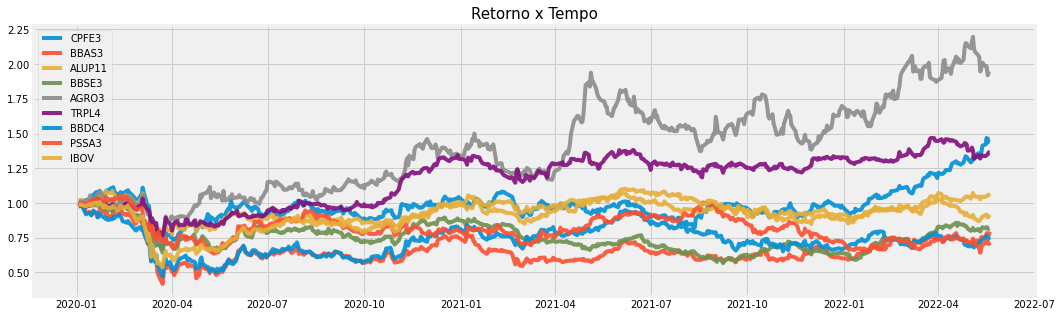

In [28]:
retorno_acum = pd.DataFrame()
for ativo in ativos_df:
    retorno_acum[ativo] = (retorno[ativo]+1).cumprod()

plt.figure(figsize=(16 ,5))
plt.plot(retorno_acum, alpha = 0.9)
plt.legend(ativos_df)
plt.title('Retorno x Tempo', fontsize=15)
plt.show()

### Conclusão

O intuito deste pequeno estudo foi mostrar como é possível começar a fazer análise de dados de ações utilizando o Python e algumas de suas bibliotecas. A partir disso é possível se aprofundar, obter insights valiosos, fazer análises preditivas e muito mais. Principalmente se tiver mais conhecimentos sobre mercado financeiro, o que não é o meu caso rsrs!